# Proyecto 1 – Atención de Incidentes  
## Tarea 2 – Exploración de Datos (EDA)

Estadísticas descriptivas y visualizaciones (histogramas, diagramas de caja, diagramas de dispersión, diagramas de violín y otros que permiten comprender cómo se comportan las variables).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("incident_event_log.csv")
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [2]:
print("Información general del DataFrame:")
print(df.info())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-nul

In [3]:
print("\nConteo de tipos de columnas:")
print(df.dtypes.value_counts())

num_dups = df.duplicated().sum()
print(f"\nFilas duplicadas: {num_dups}")


Conteo de tipos de columnas:
object    29
bool       4
int64      3
Name: count, dtype: int64

Filas duplicadas: 0


In [4]:
display(df.describe(include="number").T)

,count,mean,std,min,25%,50%,75%,max
reassignment_count,141712.0,1.104197,1.734673,0.0,0.0,1.0,1.0,27.0
reopen_count,141712.0,0.021918,0.207302,0.0,0.0,0.0,0.0,8.0
sys_mod_count,141712.0,5.080946,7.680652,0.0,1.0,3.0,6.0,129.0


In [5]:
display(df.describe(include="object").T)

,count,unique,top,freq
number,141712,24918,INC0019396,58
incident_state,141712,9,Active,38716
caller_id,141712,5245,Caller 1904,1425
opened_by,141712,208,Opened by 17,41466
opened_at,141712,19849,14/4/2016 20:42,58
sys_created_by,141712,186,?,53076
sys_created_at,141712,11553,?,53076
sys_updated_by,141712,846,Updated by 908,36162
sys_updated_at,141712,50664,24/3/2016 18:40,420
contact_type,141712,5,Phone,140462


In [6]:
na_count = df.isna().sum().sort_values(ascending=False)
na_pct = (na_count / len(df) * 100).round(2)
na_table = pd.DataFrame({"faltantes": na_count, "%": na_pct})
display(na_table)

,faltantes,%
number,0,0.0
incident_state,0,0.0
active,0,0.0
reassignment_count,0,0.0
reopen_count,0,0.0
sys_mod_count,0,0.0
made_sla,0,0.0
caller_id,0,0.0
opened_by,0,0.0
opened_at,0,0.0


In [7]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

print(f"Variables numéricas ({len(num_cols)}):", num_cols[:10], "..." if len(num_cols) > 10 else "")
print(f"Variables categóricas ({len(cat_cols)}):", cat_cols[:10], "..." if len(cat_cols) > 10 else "")

Variables numéricas (3): ['reassignment_count', 'reopen_count', 'sys_mod_count'] 
Variables categóricas (33): ['number', 'incident_state', 'active', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by'] ...


In [16]:
for c in cat_cols:
    print(f"\n{c} - cardinalidad: {df[c].nunique()}")
    vc = df[c].value_counts(dropna=False)
    print(vc.head())


number - cardinalidad: 24918
number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
Name: count, dtype: int64

incident_state - cardinalidad: 9
incident_state
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Name: count, dtype: int64

active - cardinalidad: 2
active
True     116726
False     24986
Name: count, dtype: int64

made_sla - cardinalidad: 2
made_sla
True     132497
False      9215
Name: count, dtype: int64

caller_id - cardinalidad: 5245
caller_id
Caller 1904    1425
Caller 290      791
Caller 4514     716
Caller 1441     322
Caller 298      293
Name: count, dtype: int64

opened_by - cardinalidad: 208
opened_by
Opened by  17     41466
Opened by  24      8063
Opened by  131     7269
Opened by  108     6121
Opened by  55      5655
Name: count, dtype: int64

opened_at - cardinalidad: 19849
opened_at
14/4/2016 20:42    58
4/7/2016 14:38     56
7/3/2016 

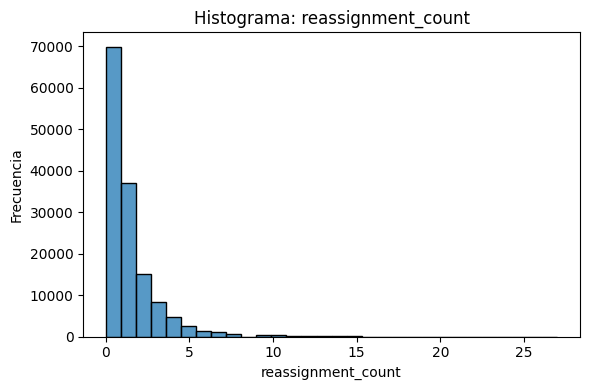

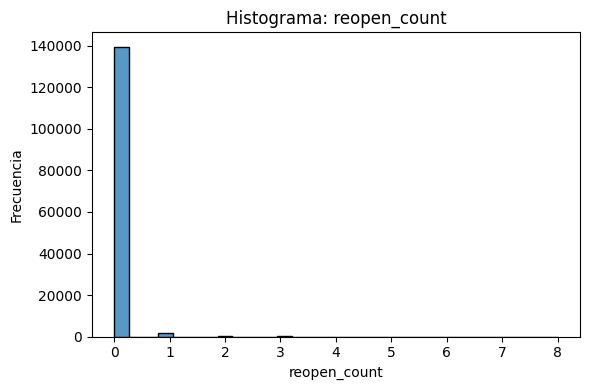

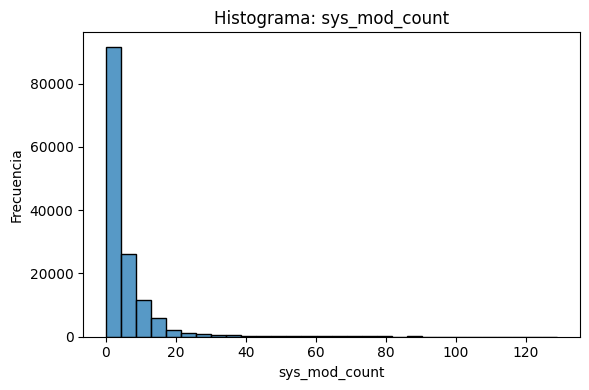

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia") 
    plt.tight_layout()
    plt.show()

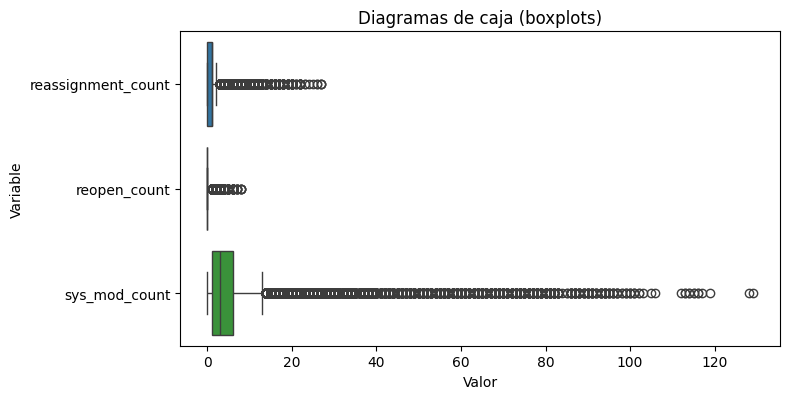

In [38]:
for i in range(0, len(num_cols),3):
    subset = num_cols[i:i+3]
    plt.figure(figsize=(8, 0.7*len(subset) + 2))
    sns.boxplot(data=df[subset], orient="h")
    plt.title("Diagramas de caja (boxplots)")
    plt.xlabel("Valor")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

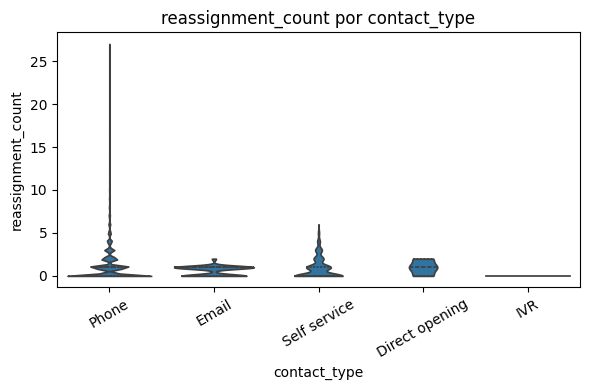

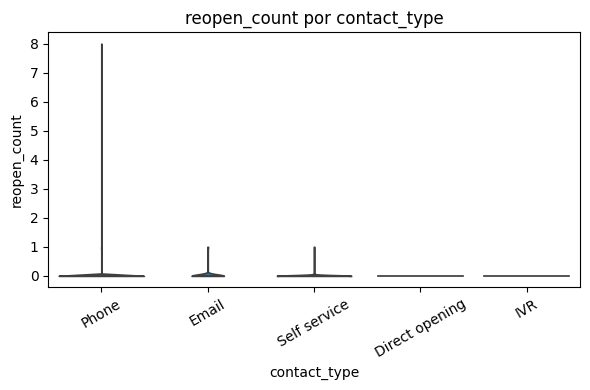

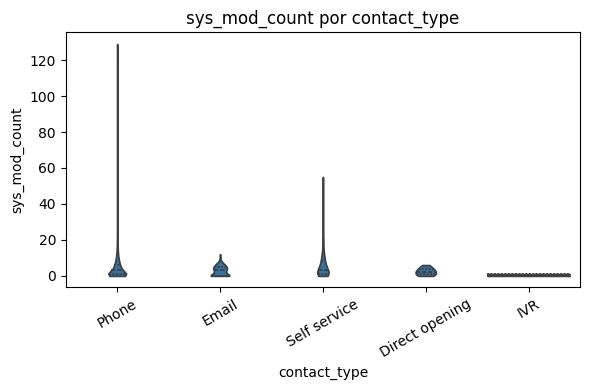

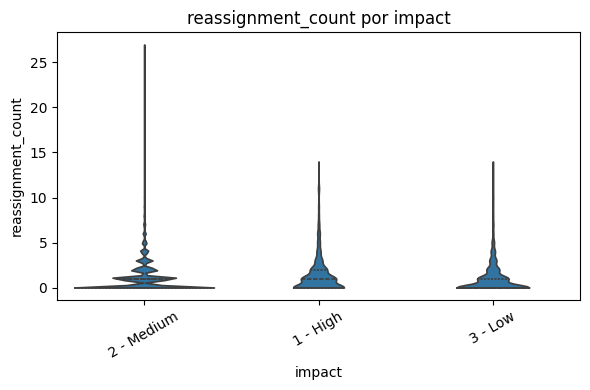

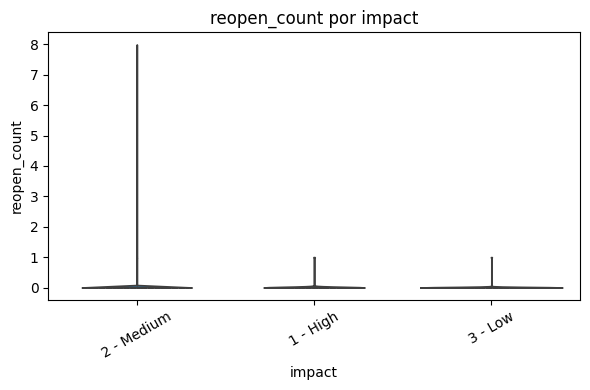

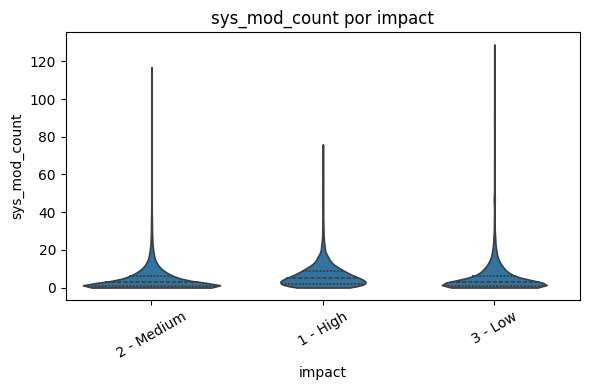

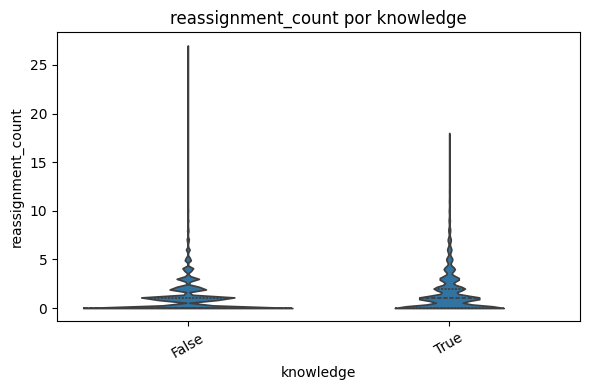

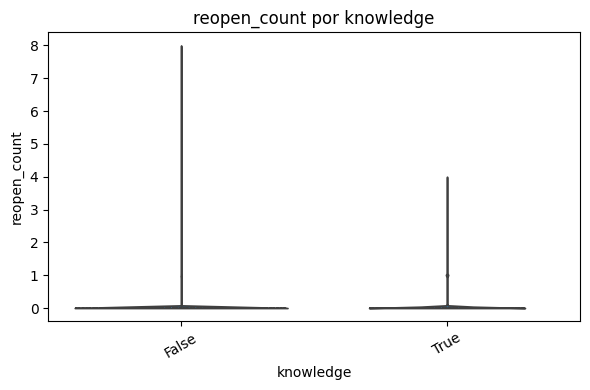

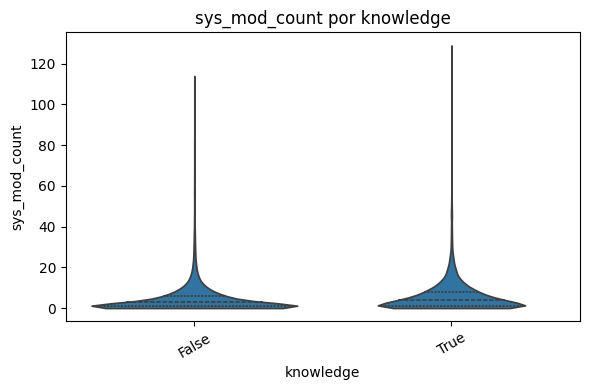

In [60]:
cat_cols_evaluacion = ["contact_type", "impact", "knowledge"]
for i in cat_cols_evaluacion:
    for j in num_cols:
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x=i, y=j, inner="quartile", cut=0)
        plt.title(f"{j} por {i}")
        plt.xlabel(i)
        plt.ylabel(j)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

Numéricas seleccionadas para scatter_matrix: ['sys_mod_count', 'reassignment_count', 'reopen_count']


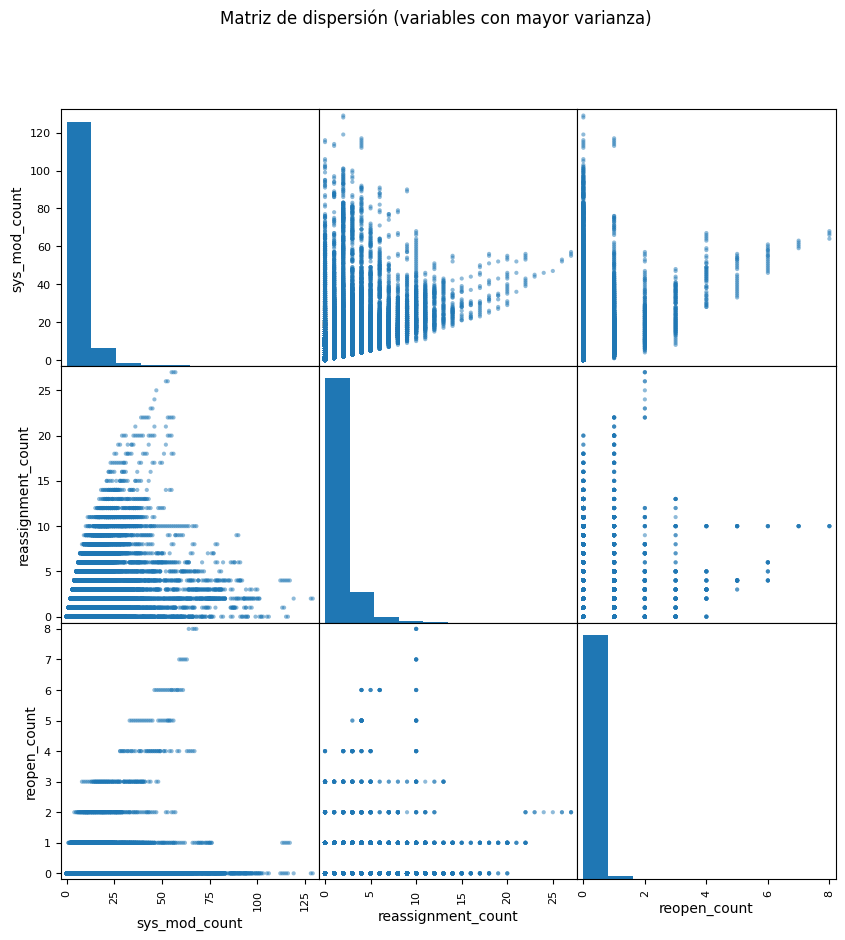

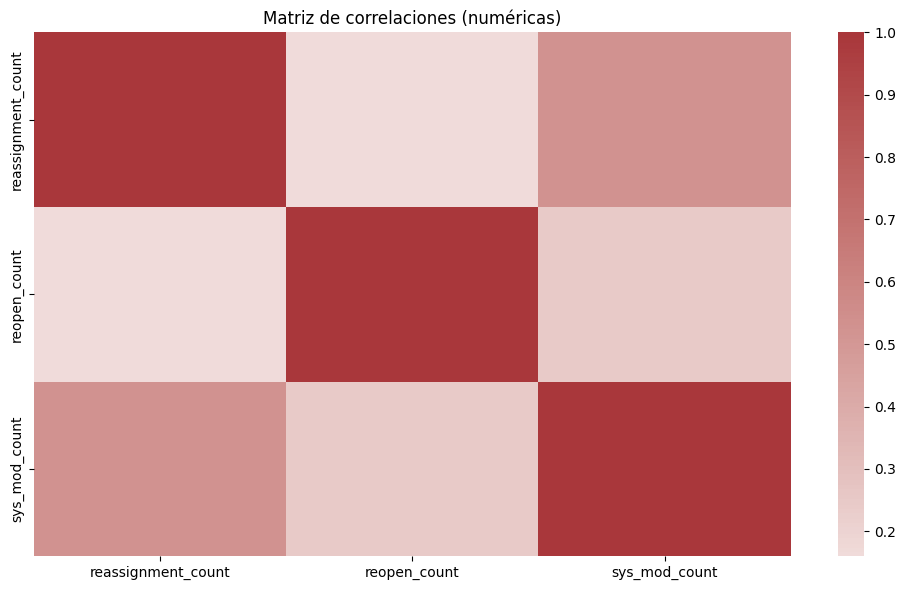

In [65]:
from pandas.plotting import scatter_matrix

#Seleccionamos hasta 5 numéricas con mayor varianza para una matriz de dispersión simple
varianza = df[num_cols].var().sort_values(ascending=False)
top_num = varianza.head(5).index.tolist()
print("Numéricas seleccionadas para scatter_matrix:", top_num)
axs = scatter_matrix(df[top_num].dropna(), figsize=(10, 10), diagonal='hist')
plt.suptitle("Matriz de dispersión (variables con mayor varianza)")
plt.show()

# Mapa de calor de correlación
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="vlag", center=0, annot=False)
plt.title("Matriz de correlaciones (numéricas)")
plt.tight_layout()
plt.show()

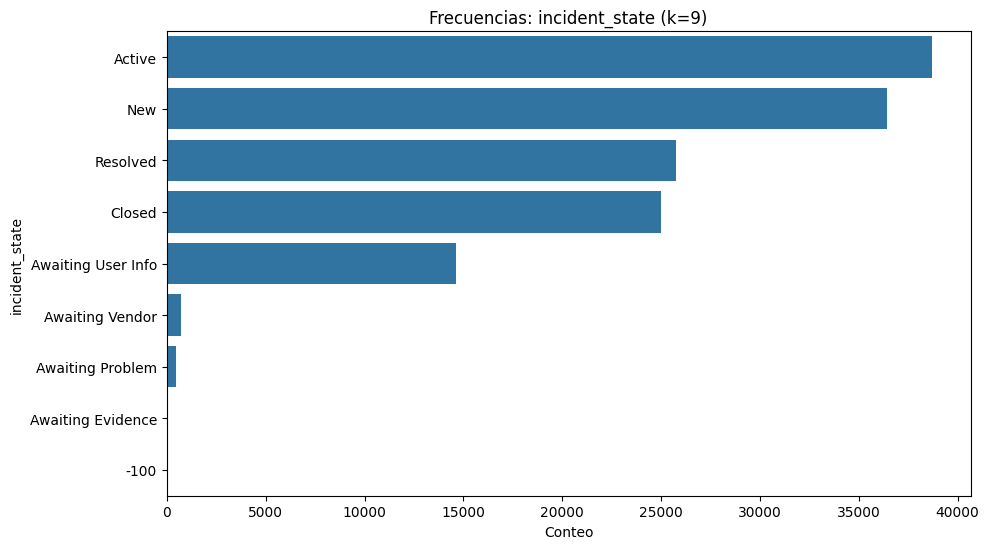

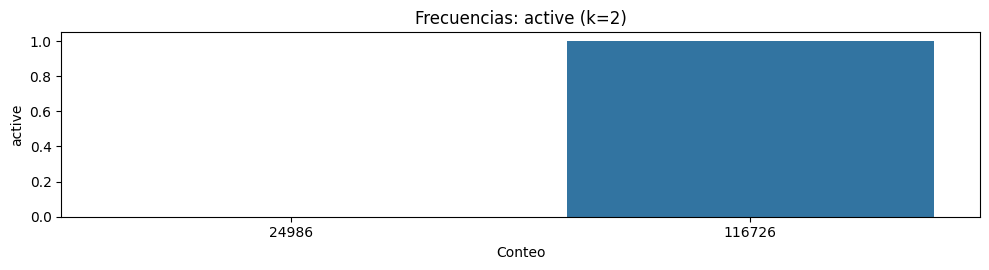

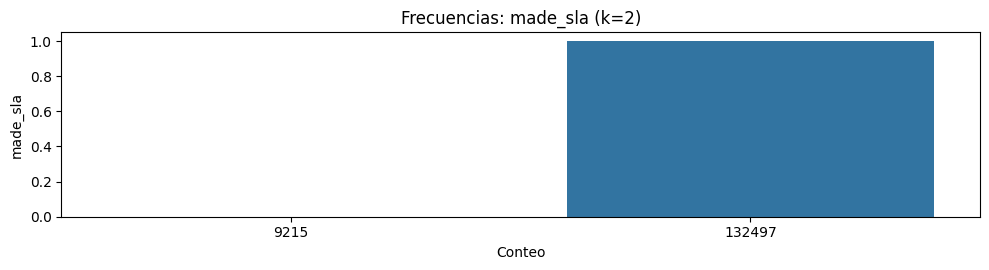

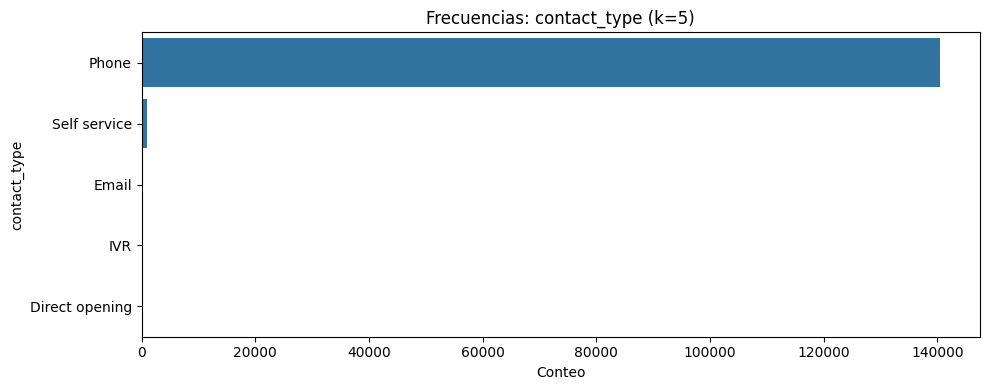

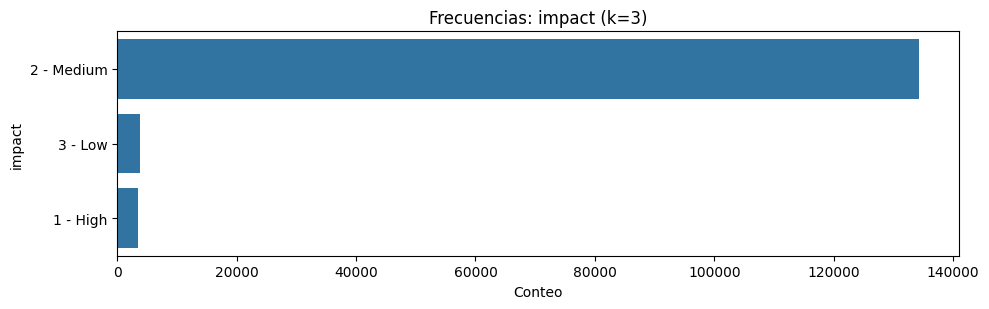

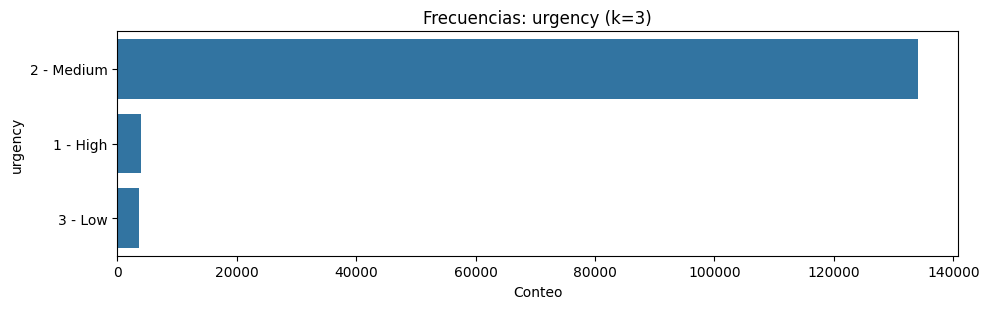

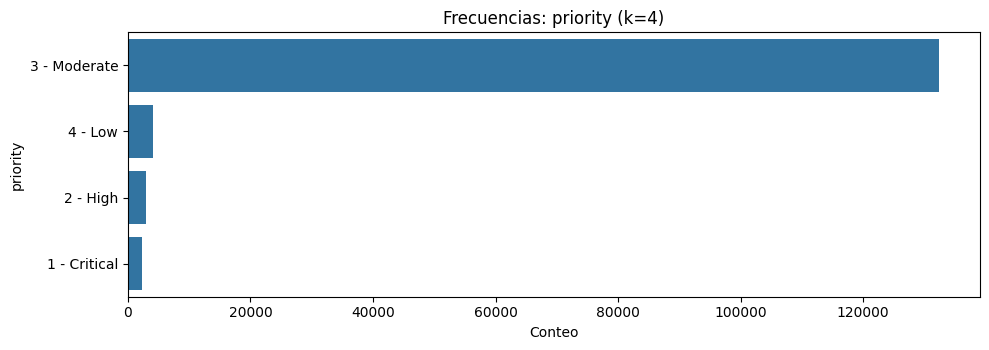

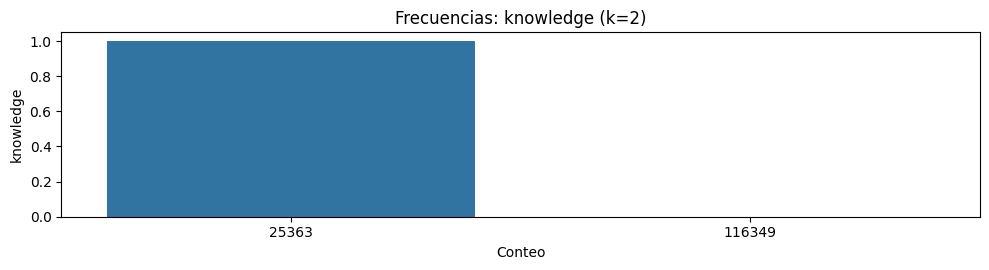

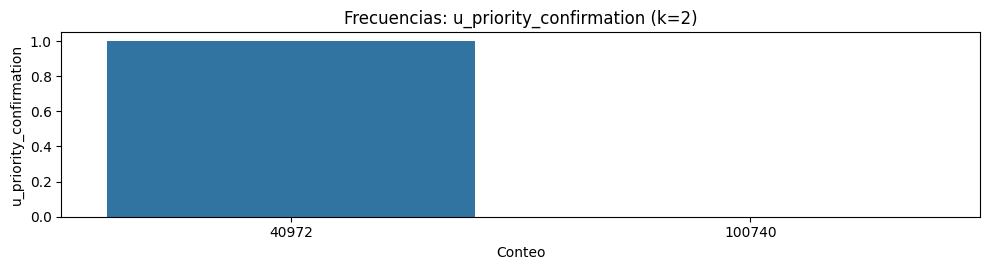

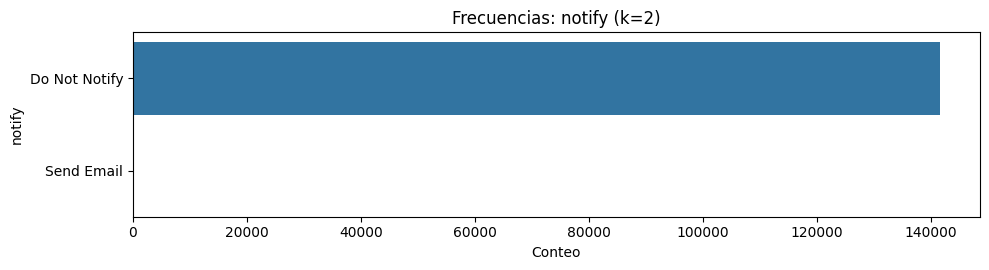

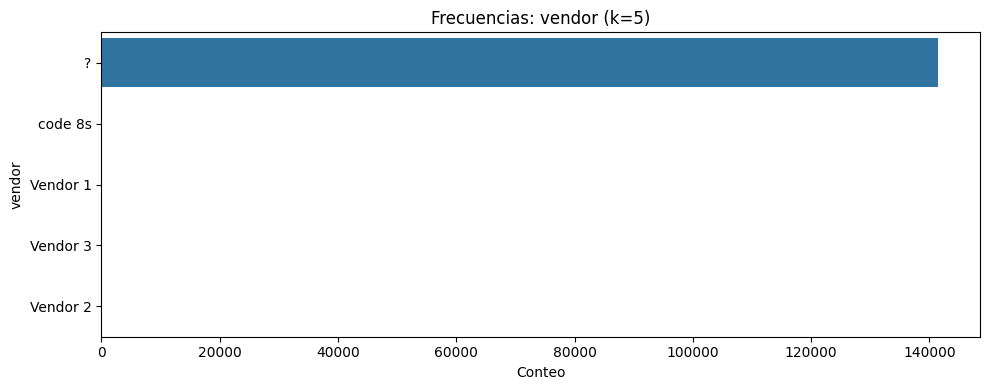

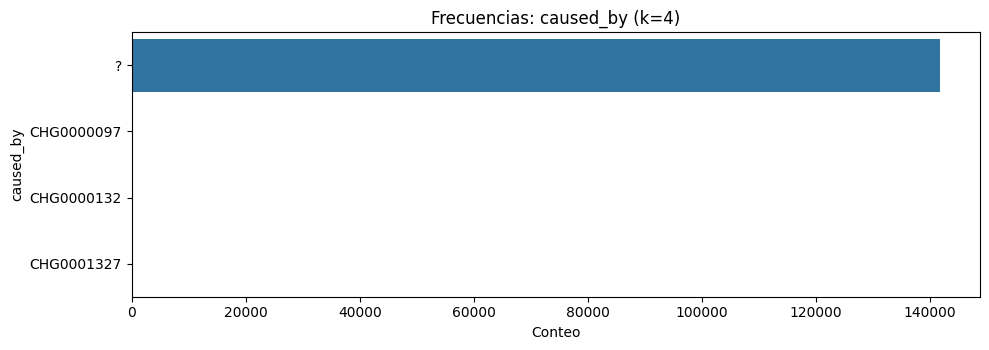

In [66]:
for c in cat_cols:
    k = df[c].nunique()
    if 1 < k <= 12:  # evita columnas con demasiadas categorías o constantes
        plt.figure(figsize=(10, 0.4*k + 2))
        vc = df[c].value_counts(dropna=False)
        sns.barplot(x=vc.values, y=vc.index)
        plt.title(f"Frecuencias: {c} (k={k})")
        plt.xlabel("Conteo")
        plt.ylabel(c)
        plt.tight_layout()
        plt.show()